# Trabajo Práctico
## Primer Desafío 
### Grupo 7

<img src='Linea_Divisoria.png' align='left' width=100%/>

### Congifuraciones Varias

In [1]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
# configuraciones globales para Pandas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('mode.chained_assignment', None)
pd.options.display.float_format = '{:.2f}'.format

# Configuraciones globales para Seaborn.
plt.style.use('seaborn')

### Carga de Conjunto de Datos Iniciales

In [3]:
#Carga del archivo CSV original en memoria para trabajanr con el mimso 

data_o = pd.read_csv(filepath_or_buffer='properati.csv')
mask_original_data = data_o['property_type'] == 'apartment'
original_data = data_o[mask_original_data]

In [4]:
#Carga del conjunto de datos orginal en el dataset resutlado 
#para ir realizando las modificaciones necesarias sin alterar el original
data_r = pd.read_csv(filepath_or_buffer='properati.csv')
mask_resultado_data = data_r['property_type'] == 'apartment'
resultado_data = data_r[mask_resultado_data]

Exploración básica del dataset observando los primeros cinco registros y los 

In [5]:
original_data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.00,"-34.9038831,-57.9643295",-34.90,-57.96,150000.00,USD,2646675.00,150000.00,nan,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.00,"-34.6522615,-58.5229825",-34.65,-58.52,72000.00,USD,1270404.00,72000.00,55.00,55.00,1309.09,1309.09,nan,nan,nan,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.00,"-38.0026256,-57.5494468",-38.00,-57.55,64000.00,USD,1129248.00,64000.00,35.00,35.00,1828.57,1828.57,nan,nan,nan,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.00,"-34.5598729,-58.443362",-34.56,-58.44,138000.00,USD,2434941.00,138000.00,45.00,40.00,3066.67,3450.00,nan,nan,nan,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.00,"-34.5598729,-58.443362",-34.56,-58.44,195000.00,USD,3440677.50,195000.00,65.00,60.00,3000.00,3250.00,nan,nan,nan,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...


In [6]:
original_data.tail()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
121211,121211,sell,apartment,Acassuso,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436508.00,NaN,nan,nan,nan,NaN,nan,nan,205.00,205.00,nan,nan,nan,nan,nan,http://www.properati.com.ar/1cj9y_venta_depart...,Excelente departamento de categoría con vistas...,Departamento - Acassuso,https://thumbs4.properati.com/0/pvevdNsjE5Kf4r...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.00,NaN,nan,nan,870000.00,USD,15350715.00,870000.00,113.00,93.00,7699.12,9354.84,nan,nan,10000.00,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.00,"-34.5706388726,-58.4755963355",-34.57,-58.48,131500.00,USD,2320251.75,131500.00,46.00,39.00,2858.70,3371.79,nan,nan,nan,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,nan,NaN,nan,nan,95900.00,USD,1692107.55,95900.00,48.00,48.00,1997.92,1997.92,nan,nan,nan,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...
121219,121219,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.00,NaN,nan,nan,129000.00,USD,2276140.50,129000.00,77.00,77.00,1675.32,1675.32,nan,nan,3500.00,http://www.properati.com.ar/1cjaa_venta_depart...,Departamento de 77 m2 apto profesional. Edific...,Departamento apto profesional en el Centro,https://thumbs4.properati.com/8/mNEsnQWqB7joBF...


### Funciones Globales

In [7]:
def detalle_df_columns(cols: list, df: pd.DataFrame) -> pd.DataFrame:
    """
    Dado un índice {cols} y un DataFrame {df}, devuelve otro DataFrame con datos descriptivos
    según las medidas especificadas en el diccionario {measures}.
    """
    measures = {
        'Valores Únicos': df.nunique(), 
        'Nulos': df.shape[0] - df.count(), 
        '% Nulos': round((df.shape[0] - df.count()) / df.shape[0] * 100, 3),
        'No Nulos': df.count(), 
        '% No Nulos': round(df.count() / df.shape[0] * 100, 3), 
        'Tipos': df.dtypes,
        'Tamaño (mb)': df.memory_usage() / 1000000
    }    
    return pd.DataFrame(index=cols, data=measures)

In [8]:
def busca_patron_regex(patron_regex, nombre_grupo_regex, columna, prefijo, \
                       df: pd.DataFrame, reemplazo=False, chrs_a_reemplazar='', chrs_reemplaza='') -> pd.DataFrame:
    """
    Dado un patron regex en el parametro patron_regex, el nombre del grupo regex deseado, 
    la columna que se quiere buscar el patron, el prefijo de la nueva columna
    y un dataframe en el parametro df devuelve un dataframe con la columna y los valores encontrados según el patron
    """
    columna_nueva = prefijo + columna
    _serie = df[columna]
    mask_no_nulos = _serie.notnull()
    _patron = re.compile(patron_regex) 
    serire_resultado = _serie[mask_no_nulos].apply(lambda x: _patron.search(x))
    if reemplazo:
        df_resultado = pd.DataFrame(serire_resultado.apply(lambda x: x if x is None else x.group(nombre_grupo_regex).replace(chrs_a_reemplazar, chrs_reemplaza)))
    else:
        df_resultado = pd.DataFrame(serire_resultado.apply(lambda x: x if x is None else x.group(nombre_grupo_regex)))
    df_resultado = df_resultado.rename({columna : columna_nueva}, axis=1)
    print ("Patrones encontrados")
    print(df_resultado[columna_nueva].notnull().value_counts())
    return df_resultado

In [9]:
def reemplaza_valores_con_resultado_regex(columna_resultado, columna_imputar, df_resultado_regex: pd.DataFrame) -> pd.DataFrame:
    """
    Dadas dos columnas, la columna de resutlado del 
    regex buscado del df_resutlado_regex y la columna a imputar del resultado_data, la función imputa los 
    valores en el df "resultado_data" y devuelve un dataframe con las dos columnas, la de imputación y 
    la a imputar antes de aplicar el reemplazo para mostrar lo que reemplzó
    """
    #creo nombre de la nueva columna para agregar los valores a imputar
    columna_nueva_auxiliar = '_' + columna_resultado + '_'
    resultado_data[columna_nueva_auxiliar] = df_resultado_regex[columna_resultado]
    #creo las mascaras para obtener los valores  imputar y los valores a reemplazar
    mask_df_resultado_no_nulos = resultado_data[columna_nueva_auxiliar].notnull()
    mask_df_original_nulos = resultado_data[columna_imputar].isnull()
    #creo dataframe para mostrar valres a reemplazar y de reemplazo
    df_mostrar = resultado_data[[columna_nueva_auxiliar, columna_imputar]][mask_df_resultado_no_nulos & mask_df_original_nulos]
    #reemplazo loa valores
    valores_reemplazados = resultado_data[[columna_imputar, columna_nueva_auxiliar]] \
    [mask_df_resultado_no_nulos & mask_df_original_nulos].apply \
    (lambda x: x[columna_nueva_auxiliar], axis=1).shape[0]
    if valores_reemplazados > 0:
        resultado_data[columna_imputar][mask_df_resultado_no_nulos & mask_df_original_nulos] = \
        resultado_data[[columna_imputar, columna_nueva_auxiliar]] \
        [mask_df_resultado_no_nulos & mask_df_original_nulos].apply \
        (lambda x: x[columna_nueva_auxiliar], axis=1)
        print('Se reemplazaron %s valores' % valores_reemplazados)
    else:
        print('No hay valores para reemplazar')
    #devuelvo los valores que reemplazo y la columna que reemplaza antes de realizar los reemplazos
    return df_mostrar

### Descripción del Conjunto de Datos Originales

Para esta descripción utilizamos la función **"detalle_df_columns"** que recibe como parámetros la lista de columnas del dataframe llamado **"cols"** y un dataframe donde recibe el dataframe que deseamos describir llamado **"df"**. Esta función devuelve otro dataframe con las descripciones de las columnas solicitadas

In [10]:
detalle_df_columns(original_data.columns, original_data)

,Valores Únicos,Nulos,% Nulos,No Nulos,% No Nulos,Tipos,Tamaño (mb)
Unnamed: 0,71065,0,0.00,71065,100.00,int64,0.57
operation,1,0,0.00,71065,100.00,object,0.57
property_type,1,0,0.00,71065,100.00,object,0.57
place_name,499,1,0.00,71064,100.00,object,0.57
place_with_parent_names,557,0,0.00,71065,100.00,object,0.57
country_name,1,0,0.00,71065,100.00,object,0.57
state_name,28,0,0.00,71065,100.00,object,0.57
geonames_id,350,8683,12.22,62382,87.78,float64,0.57
lat-lon,24260,29428,41.41,41637,58.59,object,0.57
lat,23922,29428,41.41,41637,58.59,float64,0.57


### Análisis de Publicaciones Duplicadas

Analizamos si existen publicaciones duplicadas a través de la columna **"properati_url"** para ver si es necesario eliminar o no las mismas

In [11]:
#Llamamos a la función para describir el dataframe
print("Descripción de columna properati_url")
print(detalle_df_columns(original_data.columns, original_data).loc['properati_url'])
print("")
print("Total de registros del dataset original " + str(original_data.shape[0]))


Descripción de columna properati_url
Valores Únicos     71065
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: properati_url, dtype: object

Total de registros del dataset original 71065


Como vemos en la descripción, los valores únicos y la cantidad de registros (filas) que tiene el conjunto de datos original son iguales, 121220 registros, lo que pareciera indicar que no hay valores duplicados de publicaciones

## Análisis y Tratamiento de de Variables

Análisis del contenido, cantidad de nulos y tipos de cada variable para determinar si debemos completar infromación, crear nuevas variables a partir del tratamiento de otras o desetimar dicha variable

## Variable "Unnamed: 0"

In [12]:
detalle_df_columns(original_data.columns, original_data).loc['Unnamed: 0']

Valores Únicos    71065
Nulos                 0
% Nulos            0.00
No Nulos          71065
% No Nulos       100.00
Tipos             int64
Tamaño (mb)        0.57
Name: Unnamed: 0, dtype: object

In [13]:
any(original_data['Unnamed: 0'].values == np.arange(0, original_data.shape[0]))

False

Podemos determinar que esta variable es un número secuencial que va desde 0 a n, donde n es el tamaño del conjunto de datos, al compararlo con un array de Numpy que lo definimos de 0 a la cantidad de elememntos del conjunto de datos vemos que todos los elementos de la variable se encuentran en el array cuando lo evaluamos lógicamente con la funcíon **"any"** que devuelve verdadero si todos los elementos existen en ambos lados de la comparación lógica

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "operation"

In [14]:
original_data['operation']

1         sell
2         sell
4         sell
7         sell
8         sell
          ... 
121211    sell
121215    sell
121217    sell
121218    sell
121219    sell
Name: operation, Length: 71065, dtype: object

In [15]:
detalle_df_columns(original_data.columns, original_data).loc['operation']

Valores Únicos         1
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: operation, dtype: object

In [16]:
original_data['operation'].value_counts()

sell    71065
Name: operation, dtype: int64

En el detalle de la columna podemos ver que en valores únicos dice 1, y esto no indica que esta variable toma un sólo valor. Para corroborar esto, realizamos un recuento de valores únicos en esta columna y podemos observar que todos los registrso tienen el valor **"sell"**

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "property_type	"

In [17]:
original_data['property_type']

1         apartment
2         apartment
4         apartment
7         apartment
8         apartment
            ...    
121211    apartment
121215    apartment
121217    apartment
121218    apartment
121219    apartment
Name: property_type, Length: 71065, dtype: object

In [18]:
detalle_df_columns(original_data.columns, original_data).loc['property_type']

Valores Únicos         1
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: property_type, dtype: object

In [19]:
original_data['property_type'].value_counts()

apartment    71065
Name: property_type, dtype: int64

En el detalle de esta columna podemos ver que no presenta ningún problema y se encuetra el tipo de propiedad, tampoco falta ningun registro dado que no tiene valores nulos

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "place_name"	

In [20]:
original_data['place_name']

1                La Plata
2               Mataderos
4                  Centro
7                Belgrano
8                Belgrano
               ...       
121211           Acassuso
121215           Belgrano
121217      Villa Urquiza
121218        Plaza Colón
121219    Capital Federal
Name: place_name, Length: 71065, dtype: object

In [21]:
detalle_df_columns(original_data.columns, original_data).loc['place_name']

Valores Únicos       499
Nulos                  1
% Nulos             0.00
No Nulos           71064
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: place_name, dtype: object

Esta columna tiene un valor insignificate de nulos, lo que indica que está mayormente completa, de todos modos más adelante en el análisis veremos como completar los valores faltantes

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "place_with_parent_names"

In [22]:
original_data['place_with_parent_names']

1               |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2                     |Argentina|Capital Federal|Mataderos|
4         |Argentina|Buenos Aires Costa Atlántica|Mar de...
7                      |Argentina|Capital Federal|Belgrano|
8                      |Argentina|Capital Federal|Belgrano|
                                ...                        
121211    |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121215                 |Argentina|Capital Federal|Belgrano|
121217            |Argentina|Capital Federal|Villa Urquiza|
121218    |Argentina|Buenos Aires Costa Atlántica|Mar de...
121219                          |Argentina|Capital Federal|
Name: place_with_parent_names, Length: 71065, dtype: object

In [23]:
detalle_df_columns(original_data.columns, original_data).loc['place_with_parent_names']

Valores Únicos       557
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: place_with_parent_names, dtype: object

El detalle de esta columna nos muestra que no tiene registros nulos, pero en las vistas previas podemos ver que pereciera ser la concatenación de otras tres columnas que también existen en el conjunto de datos.

In [24]:
detalle_df_columns(original_data.columns, original_data).loc \
[['place_with_parent_names', 'country_name', 'state_name', 'place_name']]

,Valores Únicos,Nulos,% Nulos,No Nulos,% No Nulos,Tipos,Tamaño (mb)
place_with_parent_names,557,0,0.00,71065,100.00,object,0.57
country_name,1,0,0.00,71065,100.00,object,0.57
state_name,28,0,0.00,71065,100.00,object,0.57
place_name,499,1,0.00,71064,100.00,object,0.57


In [25]:
parent_names_concatenado = original_data[['place_with_parent_names', 'country_name', 'state_name', 'place_name']]
parent_names_concatenado

,place_with_parent_names,country_name,state_name,place_name
1,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,La Plata
2,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,Mataderos
4,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,Centro
7,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,Belgrano
8,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,Belgrano
...,...,...,...,...
121211,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,Acassuso
121215,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,Belgrano
121217,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,Villa Urquiza
121218,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,Plaza Colón


In [26]:
parent_names_concatenado['Concatenado'] = '|' + parent_names_concatenado.iloc[:, 1] \
+ '|' + parent_names_concatenado.iloc[:, 2] + '|' + parent_names_concatenado.iloc[:, 3] + '|'
# comparo el campo concatenado con el campo place_with_parent_names para ver si hay diferencias
parent_names_concatenado_diferrencias = parent_names_concatenado.loc[(parent_names_concatenado['Concatenado'] != \
                               parent_names_concatenado['place_with_parent_names'])]
print("")
print("Cantidad de registros diferentes: " + str(parent_names_concatenado_diferrencias.shape[0]))
print("")
parent_names_concatenado_diferrencias.head(3)


Cantidad de registros diferentes: 21235



,place_with_parent_names,country_name,state_name,place_name,Concatenado
4,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,Centro,|Argentina|Buenos Aires Costa Atlántica|Centro|
12,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|Martínez|
13,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,Palermo Soho,|Argentina|Capital Federal|Palermo Soho|


In [27]:
locaciones_df = original_data['place_with_parent_names'].apply(lambda x: pd.Series(x.split('|')))
locaciones_df

,0,1,2,3,4,5,6
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,NaN,NaN
2,,Argentina,Capital Federal,Mataderos,,NaN,NaN
4,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,,NaN
7,,Argentina,Capital Federal,Belgrano,,NaN,NaN
8,,Argentina,Capital Federal,Belgrano,,NaN,NaN
...,...,...,...,...,...,...,...
121211,,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Acassuso,,NaN
121215,,Argentina,Capital Federal,Belgrano,,NaN,NaN
121217,,Argentina,Capital Federal,Villa Urquiza,,NaN,NaN
121218,,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,,NaN


In [28]:
locaciones_df = locaciones_df.rename({1 : 'col1', 2 : 'col2', 3 : 'col3', 4 : 'col4', 5 : 'col5', 6 : 'col6'}, axis=1)

In [29]:
detalle_df_columns(locaciones_df.columns, locaciones_df)

,Valores Únicos,Nulos,% Nulos,No Nulos,% No Nulos,Tipos,Tamaño (mb)
0,1,0,0.00,71065,100.00,object,0.57
col1,1,0,0.00,71065,100.00,object,0.57
col2,28,0,0.00,71065,100.00,object,0.57
col3,272,0,0.00,71065,100.00,object,0.57
col4,253,3066,4.31,67999,95.69,object,0.57
col5,11,52896,74.43,18169,25.57,object,0.57
col6,1,70750,99.56,315,0.44,object,0.57


In [30]:
mask_locaciones_df_col4 = locaciones_df['col4'].isnull()
mask_locaciones_df_col5 = locaciones_df['col5'].isnull()
mask_locaciones_df_col6 = locaciones_df['col6'].isnull()
print("")
print("Datos de split columna 4")
print(locaciones_df.loc[~mask_locaciones_df_col4, ["col4"]]['col4'].value_counts())
print("")
print("Datos de split columna 5")
print(locaciones_df.loc[~mask_locaciones_df_col4, ["col5"]]['col5'].value_counts())
print("")
print("Datos de split columna 6")
print(locaciones_df.loc[~mask_locaciones_df_col4, ["col6"]]['col6'].value_counts())



Datos de split columna 4
                       49831
Nordelta                2401
La Plata                1016
Olivos                  1014
Tigre                    834
                       ...  
Las Chacras                1
Punta Chica Village        1
Villa Vatteone             1
Junín                      1
Barrio Camet               1
Name: col4, Length: 253, dtype: int64

Datos de split columna 5
                       17854
Barrio Los Alisos        189
BarrioPortezuelo          50
Barrio El Golf            27
Enyoi                     17
QBay Yacht                13
Barrio La Alameda          7
Islas del Canal            6
Barrio Los Castores        4
Barrio La Isla             1
Barrio Los Lagos           1
Name: col5, dtype: int64

Datos de split columna 6
    315
Name: col6, dtype: int64


Con este análisis podemos ver que con la columna **"place_with_parent_names"** podríamos completar los 23 valores nulos de la columna **"place_name"**. En la vista de los valores nulos de este campo commparados con el campo que contiene los datos concatenados podermos ver que siempre es el mismo dato

In [31]:
original_data[original_data['place_name'].isnull()].iloc[:,3:5]

,place_name,place_with_parent_names
45970,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||


In [32]:
resultado_data['place_name'] = original_data.apply(lambda x: x['place_with_parent_names'].split('|')[2] \
                                                   if x['place_name'] in (np.nan, None) else x['place_name'], axis=1)

In [33]:
detalle_df_columns(original_data.columns, original_data).loc['place_name']

Valores Únicos       499
Nulos                  1
% Nulos             0.00
No Nulos           71064
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: place_name, dtype: object

In [34]:
detalle_df_columns(resultado_data.columns, resultado_data).loc['place_name']

Valores Únicos       499
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: place_name, dtype: object

En el conjunto de datos resultado pordemos ver que la columna **"place_name"** ya no tiene valores nulos, estos fueron recopilados a partir de la colulmna **"place_with_parent_names"**

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "country_name"

In [35]:
original_data['country_name']

1         Argentina
2         Argentina
4         Argentina
7         Argentina
8         Argentina
            ...    
121211    Argentina
121215    Argentina
121217    Argentina
121218    Argentina
121219    Argentina
Name: country_name, Length: 71065, dtype: object

In [36]:
detalle_df_columns(original_data.columns, original_data).loc['country_name']

Valores Únicos         1
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: country_name, dtype: object

In [37]:
original_data['country_name'].value_counts()

Argentina    71065
Name: country_name, dtype: int64

En el detalle de la columna podemos ver que en valores únicos dice 1, y esto no indica que esta variable toma un sólo valor. Para corroborar esto, realizamos un recuento de valores únicos en esta columna y podemos observar que todos los registrso tienen el valor **"Argentina"**

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "state_name"

In [38]:
original_data['state_name']

1               Bs.As. G.B.A. Zona Sur
2                      Capital Federal
4         Buenos Aires Costa Atlántica
7                      Capital Federal
8                      Capital Federal
                      ...             
121211        Bs.As. G.B.A. Zona Norte
121215                 Capital Federal
121217                 Capital Federal
121218    Buenos Aires Costa Atlántica
121219                 Capital Federal
Name: state_name, Length: 71065, dtype: object

In [39]:
detalle_df_columns(original_data.columns, original_data).loc['state_name']

Valores Únicos        28
Nulos                  0
% Nulos             0.00
No Nulos           71065
% No Nulos        100.00
Tipos             object
Tamaño (mb)         0.57
Name: state_name, dtype: object

In [40]:
original_data['state_name'].value_counts()

Capital Federal                 27037
Bs.As. G.B.A. Zona Norte        10622
Santa Fe                         7969
Córdoba                          6681
Buenos Aires Costa Atlántica     6461
Bs.As. G.B.A. Zona Sur           5507
Bs.As. G.B.A. Zona Oeste         3618
Buenos Aires Interior             845
Tucumán                           425
Neuquén                           394
Mendoza                           327
Río Negro                         325
Misiones                          187
Corrientes                        145
Entre Ríos                        144
Salta                             129
Formosa                            53
La Pampa                           48
Chubut                             39
San Luis                           36
Chaco                              19
San Juan                           16
Tierra Del Fuego                   12
Catamarca                          12
Jujuy                              10
La Rioja                            2
Santa Cruz  

En el detalle de esta columna podemos ver que no presenta ningún problema y se encuetra el tipo de propiedad, tampoco falta ningun registro dado que no tiene valores nulos, también podemos observar que tiene muy pocos valores distintos, esto hace suponer que está correctamente tabulada la información de provincias

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "geonames_id"

In [41]:
original_data['geonames_id']

1        3432039.00
2        3430787.00
4        3435548.00
7        3436077.00
8        3436077.00
            ...    
121211   3436508.00
121215   3436077.00
121217   3433775.00
121218          nan
121219   3433955.00
Name: geonames_id, Length: 71065, dtype: float64

In [42]:
detalle_df_columns(original_data.columns, original_data).loc['geonames_id']

Valores Únicos        350
Nulos                8683
% Nulos             12.22
No Nulos            62382
% No Nulos          87.78
Tipos             float64
Tamaño (mb)          0.57
Name: geonames_id, dtype: object


Asumimos hipoteticamente que este campo hacereferencia a la base de datos de la página https://www.geonames.org/

En este caso, podría ser útil evaluar si existen casos donde **"geonames_id"** pueda complementar a las columnas de **"lat"** y **"lon"**.

El conjunto de datos de las posiciones geográficas se descargo desde: https://download.geonames.org/export/dump/

In [43]:
geoposicion_columnas = ['geonames_id', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 
                    'admin1_code', 'admin2_code', 'admin3_code', 'admin4 code', 'population', 'elevation', 'dem', 'timezone', 'modification date']

geoposicion_df = pd.read_csv('geo_pos.txt', delimiter='\t', names=geoposicion_columnas)
geoposicion_df.set_index('geonames_id', inplace=True)
geoposicion_df.head()

C:\Users\spiazza\.conda\envs\dhdsblend\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,name,asciiname,alternatenames,latitude,longitude,feature_class,feature_code,country_code,cc2,admin1_code,admin2_code,admin3_code,admin4 code,population,elevation,dem,timezone,modification date
geonames_id,,,,,,,,,,,,,,,,,,
2509292,Arroyo de la Zurita,Arroyo de la Zurita,NaN,39.52,-3.85,H,STMI,ES,NaN,54,TO,45200,nan,0,nan,718,Europe/Madrid,2011-10-11
2509293,Zurgena,Zurgena,NaN,37.34,-2.04,P,PPLA3,ES,NaN,51,AL,04103,nan,2317,nan,244,Europe/Madrid,2012-03-04
2509294,Zúñiga,Zuniga,"Caserio Zuniga,Caserío Zúñiga,Zuniga,Zúñiga",37.80,-1.70,P,PPL,ES,NaN,31,MU,30024,nan,0,nan,563,Europe/Madrid,2016-01-09
2509295,Río Zumeta,Rio Zumeta,"Rio Zumeta,Río Zumeta",38.22,-2.45,H,STM,ES,NaN,54,AB,02055,nan,0,nan,735,Europe/Madrid,2020-08-13
2509296,Arroyo del Zumajo del Olivar,Arroyo del Zumajo del Olivar,NaN,36.67,-5.90,H,STMI,ES,NaN,51,CA,11020,nan,0,nan,25,Europe/Madrid,1993-12-23



Más adelante evaluaremos si algunos de los valores faltantes de **"geonames_id"** se pueden complementar con las columnas de **"lat"** y **"lon"** y este dataset descargado, o también si los valores de datos de longitud y latitud están correctos.


<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "lat-lon"

In [44]:
original_data['lat-lon']

1               -34.9038831,-57.9643295
2               -34.6522615,-58.5229825
4               -38.0026256,-57.5494468
7                -34.5598729,-58.443362
8                -34.5598729,-58.443362
                      ...              
121211                              NaN
121215                              NaN
121217    -34.5706388726,-58.4755963355
121218                              NaN
121219                              NaN
Name: lat-lon, Length: 71065, dtype: object

In [45]:
detalle_df_columns(original_data.columns, original_data).loc['lat-lon']

Valores Únicos     24260
Nulos              29428
% Nulos            41.41
No Nulos           41637
% No Nulos         58.59
Tipos             object
Tamaño (mb)         0.57
Name: lat-lon, dtype: object

In [46]:
mask_geonames_id_nulos = original_data['geonames_id'].isnull()
mask_lat_lon_nulos = original_data['lat-lon'].isnull()

print("")
print("Comparativa de la mascara de nulos de geonames_id con la mascara de nulos lat-lon")
print(any(mask_geonames_id_nulos == mask_lat_lon_nulos))


Comparativa de la mascara de nulos de geonames_id con la mascara de nulos lat-lon
True



Esta comparativa nos demuestra que el campo **"geonames_id"** y el campo **"lat-lon"** tienen los mismo nulos, lo que nos indica que no vamos a poder completar datos en una columna de estas a partir de la otra


<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "lat"

In [47]:
original_data['lat']

1        -34.90
2        -34.65
4        -38.00
7        -34.56
8        -34.56
          ...  
121211      nan
121215      nan
121217   -34.57
121218      nan
121219      nan
Name: lat, Length: 71065, dtype: float64

In [48]:
detalle_df_columns(original_data.columns, original_data).loc['lat']

Valores Únicos      23922
Nulos               29428
% Nulos             41.41
No Nulos            41637
% No Nulos          58.59
Tipos             float64
Tamaño (mb)          0.57
Name: lat, dtype: object

In [49]:
mask_lat_lon_nulos = original_data['lat-lon'].isnull()
mask_lat_nulos = original_data['lat'].isnull()

print("")
print("Comparativa de la mascara de nulos de lat con la mascara de nulos lat-lon")
print(any(mask_lat_nulos == mask_lat_lon_nulos))


Comparativa de la mascara de nulos de lat con la mascara de nulos lat-lon
True



Esta comparativa nos demuestra que el campo **"lat"** y el campo **"lat-lon"** tienen los mismo nulos, lo que nos indica que no vamos a poder completar datos en una columna de estas a partir de la otra


<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "lon"

In [50]:
original_data['lon']

1        -57.96
2        -58.52
4        -57.55
7        -58.44
8        -58.44
          ...  
121211      nan
121215      nan
121217   -58.48
121218      nan
121219      nan
Name: lon, Length: 71065, dtype: float64

In [51]:
detalle_df_columns(original_data.columns, original_data).loc['lon']

Valores Únicos      23889
Nulos               29428
% Nulos             41.41
No Nulos            41637
% No Nulos          58.59
Tipos             float64
Tamaño (mb)          0.57
Name: lon, dtype: object

In [52]:
mask_lat_lon_nulos = original_data['lat-lon'].isnull()
mask_lon_nulos = original_data['lon'].isnull()

print("")
print("Comparativa de la mascara de nulos de lon con la mascara de nulos lat-lon")
print(any(mask_lon_nulos == mask_lat_lon_nulos))


Comparativa de la mascara de nulos de lon con la mascara de nulos lat-lon
True



Esta comparativa nos demuestra que el campo **"lon"** y el campo **"lat-lon"** tienen los mismo nulos, lo que nos indica que no vamos a poder completar datos en una columna de estas a partir de la otra


<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "Price"

In [53]:
original_data['price']

1        150000.00
2         72000.00
4         64000.00
7        138000.00
8        195000.00
            ...   
121211         nan
121215   870000.00
121217   131500.00
121218    95900.00
121219   129000.00
Name: price, Length: 71065, dtype: float64

In [54]:
detalle_df_columns(original_data.columns, original_data).loc['price']

Valores Únicos       9364
Nulos               11449
% Nulos             16.11
No Nulos            59616
% No Nulos          83.89
Tipos             float64
Tamaño (mb)          0.57
Name: price, dtype: object

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "currency"

In [55]:
original_data['currency']

1         USD
2         USD
4         USD
7         USD
8         USD
         ... 
121211    NaN
121215    USD
121217    USD
121218    USD
121219    USD
Name: currency, Length: 71065, dtype: object

In [56]:
detalle_df_columns(original_data.columns, original_data).loc['currency']

Valores Únicos         3
Nulos              11449
% Nulos            16.11
No Nulos           59616
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: currency, dtype: object

In [57]:
original_data['currency'].value_counts()

USD    49262
ARS    10352
PEN        2
Name: currency, dtype: int64

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "price_aprox_local_currency"

In [58]:
original_data['price_aprox_local_currency']

1         2646675.00
2         1270404.00
4         1129248.00
7         2434941.00
8         3440677.50
             ...    
121211           nan
121215   15350715.00
121217    2320251.75
121218    1692107.55
121219    2276140.50
Name: price_aprox_local_currency, Length: 71065, dtype: float64

In [59]:
detalle_df_columns(original_data.columns, original_data).loc['price_aprox_local_currency']

Valores Únicos       9828
Nulos               11449
% Nulos             16.11
No Nulos            59616
% No Nulos          83.89
Tipos             float64
Tamaño (mb)          0.57
Name: price_aprox_local_currency, dtype: object

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "price_aprox_usd"

In [60]:
original_data['price_aprox_usd']

1        150000.00
2         72000.00
4         64000.00
7        138000.00
8        195000.00
            ...   
121211         nan
121215   870000.00
121217   131500.00
121218    95900.00
121219   129000.00
Name: price_aprox_usd, Length: 71065, dtype: float64

In [61]:
detalle_df_columns(original_data.columns, original_data).loc['price_aprox_usd']

Valores Únicos       9828
Nulos               11449
% Nulos             16.11
No Nulos            59616
% No Nulos          83.89
Tipos             float64
Tamaño (mb)          0.57
Name: price_aprox_usd, dtype: object

Esta columna es una de las que consideramos relevantes para el estudio que queremos realizar y vamos a intentar completar sus valores con otras columnas

Las alternativas para completar los valores faltantes que tomamos son tres:
- búsqueda dentro de los valores de la columna **title**.
- búsqueda dentro de los valores de la columna **description**.


In [62]:
pat_regex_1 = '(?P<dolar>[Uu][S\$s][Ss\$])\s?(?P<precio>(\d+\.\d+)+)' # 'uss u$s us$ 1000'
pat_regex_2 = '(?P<dolar>[Uu][Ss][Dd])\s?(?P<precio>(\d+\.\d+)+)' # 'usd USD 1000'
pat_regex_3 = '(?P<precio>(\d+\.\d+)+)\s?(?P<dolar>[Uu][S\$s][Ss\$])' # 1000 uss u$s us$
pat_regex_4 = '(?P<precio>(\d+\.\d+)+)\s?(?P<dolar>[Uu][Ss][Dd])' # 1000 usd USD

In [63]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_1 = busca_patron_regex(pat_regex_1, 'precio', 'title', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_title', 'price_aprox_usd', df_resultado_titles_regex_1))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos       9828
Nulos               11449
% Nulos             16.11
No Nulos            59616
% No Nulos          83.89
Tipos             float64
Tamaño (mb)          0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    69270
True      1795
Name: precio_title, dtype: int64
Se reemplazaron 3 valores
       _precio_title_  price_aprox_usd
22370          125000              nan
25757           35080              nan
103676          55000              nan
Valores Únicos      9831
Nulos              11446
% Nulos            16.11
No Nulos           59619
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


In [64]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_2 = busca_patron_regex(pat_regex_2, 'precio', 'title', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_title', 'price_aprox_usd', df_resultado_titles_regex_2))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9831
Nulos              11446
% Nulos            16.11
No Nulos           59619
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    71042
True        23
Name: precio_title, dtype: int64
Se reemplazaron 1 valores
      _precio_title_ price_aprox_usd
48651          68000             NaN
Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


In [65]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_3 = busca_patron_regex(pat_regex_3, 'precio', 'title', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_title', 'price_aprox_usd', df_resultado_titles_regex_3))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    71065
Name: precio_title, dtype: int64
No hay valores para reemplazar
Empty DataFrame
Columns: [_precio_title_, price_aprox_usd]
Index: []
Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


In [66]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_4 = busca_patron_regex(pat_regex_4, 'precio', 'title', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_title', 'price_aprox_usd', df_resultado_titles_regex_4))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    71064
True         1
Name: precio_title, dtype: int64
No hay valores para reemplazar
Empty DataFrame
Columns: [_precio_title_, price_aprox_usd]
Index: []
Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


In [67]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_1 = busca_patron_regex(pat_regex_1, 'precio', 'description', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_description', 'price_aprox_usd', df_resultado_titles_regex_1))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9832
Nulos              11445
% Nulos            16.11
No Nulos           59620
% No Nulos         83.89
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    66579
True      4484
Name: precio_description, dtype: int64
Se reemplazaron 287 valores
       _precio_description_ price_aprox_usd
1694                  20000             NaN
1724                  85000             NaN
1855                  94000             NaN
1893                  17000             NaN
1965                 145000             NaN
...                     ...             ...
120910                20000             NaN
120911                20000             NaN
120912                20000             NaN
120913                20000             NaN
120914                20000             NaN

[287 rows x 2 columns]
Valores Únicos      9902
Nulos              11158
% Nulos            15.70
No Nulos           59907
% No Nulos        

In [68]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_2 = busca_patron_regex(pat_regex_2, 'precio', 'description', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_description', 'price_aprox_usd', df_resultado_titles_regex_2))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9902
Nulos              11158
% Nulos            15.70
No Nulos           59907
% No Nulos         84.30
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    70120
True       943
Name: precio_description, dtype: int64
Se reemplazaron 79 valores
       _precio_description_ price_aprox_usd
1743                 255000             NaN
2086                 300000             NaN
2087                 142000             NaN
2088                 155000             NaN
2369                  98000             NaN
...                     ...             ...
114203                15000             NaN
115881                45000             NaN
120770                40000             NaN
120771                40000             NaN
120787                30000             NaN

[79 rows x 2 columns]
Valores Únicos      9914
Nulos              11079
% Nulos            15.59
No Nulos           59986
% No Nulos         8

In [69]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_3 = busca_patron_regex(pat_regex_3, 'precio', 'description', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_description', 'price_aprox_usd', df_resultado_titles_regex_3))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9914
Nulos              11079
% Nulos            15.59
No Nulos           59986
% No Nulos         84.41
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    71014
True        49
Name: precio_description, dtype: int64
Se reemplazaron 1 valores
     _precio_description_ price_aprox_usd
4524               110000             NaN
Valores Únicos      9914
Nulos              11078
% Nulos            15.59
No Nulos           59987
% No Nulos         84.41
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


In [70]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_4 = busca_patron_regex(pat_regex_4, 'precio', 'description', 'precio_', original_data, True, '.', '')
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('precio_description', 'price_aprox_usd', df_resultado_titles_regex_4))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['price_aprox_usd'])

Valores Únicos      9914
Nulos              11078
% Nulos            15.59
No Nulos           59987
% No Nulos         84.41
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object
Patrones encontrados
False    71017
True        46
Name: precio_description, dtype: int64
No hay valores para reemplazar
Empty DataFrame
Columns: [_precio_description_, price_aprox_usd]
Index: []
Valores Únicos      9914
Nulos              11078
% Nulos            15.59
No Nulos           59987
% No Nulos         84.41
Tipos             object
Tamaño (mb)         0.57
Name: price_aprox_usd, dtype: object


Luego de realiar todas las imputaciones volvemos a convertir la columna a tipo de número flotante para ver que no quedo ningún datos sobre el que no se pueda operar.

In [71]:
resultado_data['price_aprox_usd'] = resultado_data['price_aprox_usd'].astype(float)

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "surface_total_in_m2"

In [72]:
original_data['surface_total_in_m2']

1           nan
2         55.00
4         35.00
7         45.00
8         65.00
          ...  
121211   205.00
121215   113.00
121217    46.00
121218    48.00
121219    77.00
Name: surface_total_in_m2, Length: 71065, dtype: float64

In [73]:
detalle_df_columns(original_data.columns, original_data).loc['surface_total_in_m2']

Valores Únicos        511
Nulos               19980
% Nulos             28.11
No Nulos            51085
% No Nulos          71.89
Tipos             float64
Tamaño (mb)          0.57
Name: surface_total_in_m2, dtype: object

Al igual que el caso anterior de **precio_aprox_usd**, este campo es crítico a los fines de explicar el precio. Por ende, se debe hacer el mayor esfuerzo posible para:
- recuperar la mayor cantidad de los valores faltantes.
- verificar que los valores existentes estén correctos.

Las alternativas para completar los valores faltantes son tres:
- búsqueda dentro de los valores de la columna **title**.
- búsqueda dentro de los valores de la columna **description**.
- búsqueda dentro de los valores de la columna **properati_url**.


In [74]:
pat_m2_regex_1 = '(?i)(tot(al(es)?)?)?:?\s?(?P<m2>(\s\d+\.?\d)+)\s?[Mm][Tt]?[Ss]?[2²]?\s?(tot(al(es)?)?)?'

In [75]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_1 = busca_patron_regex(pat_m2_regex_1, 'm2', 'title', 'm2_', original_data, False)
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('m2_title', 'surface_total_in_m2', df_resultado_titles_regex_1))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])

Valores Únicos        511
Nulos               19980
% Nulos             28.11
No Nulos            51085
% No Nulos          71.89
Tipos             float64
Tamaño (mb)          0.57
Name: surface_total_in_m2, dtype: object
Patrones encontrados
False    67926
True      3139
Name: m2_title, dtype: int64
Se reemplazaron 444 valores
       _m2_title_  surface_total_in_m2
77             85                  nan
79             42                  nan
476            97                  nan
991            30                  nan
992            34                  nan
...           ...                  ...
119684        154                  nan
119893        500                  nan
119901         46                  nan
119915         68                  nan
120185         30                  nan

[444 rows x 2 columns]
Valores Únicos       641
Nulos              19536
% Nulos            27.49
No Nulos           51529
% No Nulos         72.51
Tipos             object
Tamaño (mb)         0.57
Na

In [76]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_1 = busca_patron_regex(pat_m2_regex_1, 'm2', 'description', 'm2_', original_data, False)
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('m2_description', 'surface_total_in_m2', df_resultado_titles_regex_1))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])

Valores Únicos       641
Nulos              19536
% Nulos            27.49
No Nulos           51529
% No Nulos         72.51
Tipos             object
Tamaño (mb)         0.57
Name: surface_total_in_m2, dtype: object
Patrones encontrados
False    50248
True     20815
Name: m2_description, dtype: int64
Se reemplazaron 4758 valores
       _m2_description_ surface_total_in_m2
109                  60                 NaN
112                  90                 NaN
143                  36                 NaN
148                  92                 NaN
163                  80                 NaN
...                 ...                 ...
120623             1000                 NaN
120633               56                 NaN
120957               35                 NaN
120965              250                 NaN
121072               50                 NaN

[4758 rows x 2 columns]
Valores Únicos       875
Nulos              14778
% Nulos            20.80
No Nulos           56287
% No Nulos      

In [77]:
#ATENCIÓN - Esto se puede ejecutar una sola vez, 
#la segunda vez no tiene efecto y no muestra resultados y dice que no hay valores para reemplzar

#imprimo detalle antes de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])
#llamo a la función que busca el patron regex que está en el bloque de definición de funciones globales
df_resultado_titles_regex_1 = busca_patron_regex(pat_m2_regex_1, 'm2', 'properati_url', 'm2_', original_data, False)
#llamo a la función para reemplazar los valores a imputar
print(reemplaza_valores_con_resultado_regex('m2_properati_url', 'surface_total_in_m2', df_resultado_titles_regex_1))
#imprimo detalle luego de la imputación
print(detalle_df_columns(resultado_data.columns, resultado_data).loc['surface_total_in_m2'])

Valores Únicos       875
Nulos              14778
% Nulos            20.80
No Nulos           56287
% No Nulos         79.20
Tipos             object
Tamaño (mb)         0.57
Name: surface_total_in_m2, dtype: object
Patrones encontrados
False    71065
Name: m2_properati_url, dtype: int64
No hay valores para reemplazar
Empty DataFrame
Columns: [_m2_properati_url_, surface_total_in_m2]
Index: []
Valores Únicos       875
Nulos              14778
% Nulos            20.80
No Nulos           56287
% No Nulos         79.20
Tipos             object
Tamaño (mb)         0.57
Name: surface_total_in_m2, dtype: object


Luego de realiar todas las imputaciones volvemos a convertir la columna a tipo de número flotante para ver que no quedo ningún datos sobre el que no se pueda operar.

In [78]:
resultado_data['surface_total_in_m2'] = resultado_data['surface_total_in_m2'].astype(float)

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "price_usd_per_m2"

In [79]:
original_data['price_usd_per_m2']

1            nan
2        1309.09
4        1828.57
7        3066.67
8        3000.00
           ...  
121211       nan
121215   7699.12
121217   2858.70
121218   1997.92
121219   1675.32
Name: price_usd_per_m2, Length: 71065, dtype: float64

In [80]:
detalle_df_columns(original_data.columns, original_data).loc['price_usd_per_m2']

Valores Únicos      17530
Nulos               28178
% Nulos             39.65
No Nulos            42887
% No Nulos          60.35
Tipos             float64
Tamaño (mb)          0.57
Name: price_usd_per_m2, dtype: object

Más abajo analizamos si algún valor por metro cuadrado existe y no existe algunos de los valores de precio total o metros cuadrados para poder calcular el faltante, pero podemos ver que no hay casos.

In [81]:
mask_precio_nulos = resultado_data['price_aprox_usd'].isnull()
mask_m2_nulos = resultado_data['surface_total_in_m2'].isnull()
mask_precio_m2_no_nulos = resultado_data['price_usd_per_m2'].notnull()

resultado_data[['price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2']][(mask_precio_nulos | mask_m2_nulos) & mask_precio_m2_no_nulos]

,price_aprox_usd,surface_total_in_m2,price_usd_per_m2


Ahora más abajo analizamos si algún valor por metro cuadrado tiene valor nulo y existe algunos de los valores de precio total o metros cuadrados para poder calcular el faltante, podemos ver que hay 6180 casos.

In [82]:
mask_precio_no_nulos = resultado_data['price_aprox_usd'].notnull()
mask_m2_no_nulos = resultado_data['surface_total_in_m2'].notnull()
mask_precio_m2_nulos = resultado_data['price_usd_per_m2'].isnull()


resultado_data['price_usd_per_m2'] \
[mask_precio_no_nulos & mask_m2_no_nulos & mask_precio_m2_nulos] = \
resultado_data[['price_aprox_usd', 'surface_total_in_m2', 'price_usd_per_m2']] \
[mask_precio_no_nulos & mask_m2_no_nulos & mask_precio_m2_nulos].apply \
(lambda x: x['surface_total_in_m2'] if x['surface_total_in_m2'] == 0 else x['price_aprox_usd'] / x['surface_total_in_m2'], axis=1)


In [83]:
detalle_df_columns(resultado_data.columns, resultado_data).loc['price_usd_per_m2']

Valores Únicos      19619
Nulos               23276
% Nulos             32.75
No Nulos            47789
% No Nulos          67.25
Tipos             float64
Tamaño (mb)          0.57
Name: price_usd_per_m2, dtype: object

<img src='Linea_Divisoria_fina.png' align='left' width=100%/>

## Variable "rooms"

In [84]:
original_data['rooms']

1        nan
2        nan
4        nan
7        nan
8        nan
          ..
121211   nan
121215   nan
121217   nan
121218   nan
121219   nan
Name: rooms, Length: 71065, dtype: float64

In [85]:
detalle_df_columns(original_data.columns, original_data).loc['rooms']

Valores Únicos         22
Nulos               39797
% Nulos             56.00
No Nulos            31268
% No Nulos          44.00
Tipos             float64
Tamaño (mb)          0.57
Name: rooms, dtype: object

In [86]:
original_data['rooms'].value_counts()

2.00     10664
3.00      7946
1.00      6940
4.00      3867
5.00      1162
6.00       330
7.00       174
8.00        86
9.00        34
10.00       22
12.00       12
11.00        9
14.00        5
13.00        3
17.00        3
32.00        2
15.00        2
22.00        2
20.00        2
25.00        1
18.00        1
21.00        1
Name: rooms, dtype: int64

La cantidad de ambientes, representada por el campo *rooms*, es importante para darle contexto al precio de la propiedad. 

Las alternativas para completar los valores faltantes son dos:
- búsqueda dentro de los valores de la columna **title**.
- búsqueda dentro de los valores de la columna **description**.


Para analizar este campo ya no nos sirve la fución que construimos para los valores anteriores, este análisis requiere de campos de texto y luego esto convertirlo a numérico

In [87]:
pat_rooms_regex_0 = '((monoamb|monoambiente))'  # 'monoamb'
pat_rooms_regex_1 = '(\d+)(\s)(\b(amb))'  # '2 amb'
pat_rooms_regex_2 = '((\b(amb))(\D)(\d+))' # ' amb:2'
pat_rooms_regex_3 = '(\d+)((amb)\b)'  # ' 3amb'
pat_rooms_regex_4 = '(\b(dos))(\s)(\b(amb))' # 'dos ambientes'
pat_rooms_regex_5 = '(\b(tres))(\s)(\b(amb))'  # 'tres ambientes'
pat_rooms_regex_6 = '(\b(cuatro))(\s)(\b(amb))'  # 'cuatro ambientes'
pat_rooms_regex_7 = '(\b(cinco))(\s)(\b(amb))'  # 'cinco ambientes'
pat_rooms_regex_8 = '(\b(seis))(\s)(\b(amb))'  # 'seis ambientes'
pat_rooms_regex_9 = '(\b(siete))(\s)(\b(amb))' # 'siete ambientes'

In [88]:

def aplica_regex_rooms (pat_regex, ambientes, columna):
    columna_nueva = '_rooms_' + columna + '_'
    patron_regex = re.compile(pat_regex, flags = re.IGNORECASE)
    rooms_series = original_data[columna]
    mask_no_nulos = rooms_series.notnull()
    rooms_regex = rooms_series[mask_no_nulos].apply(lambda x: None if patron_regex.search(x) is None else ambientes)
    resultado_data[columna_nueva] = rooms_regex
    #prepar los mascaras para el reemplazo de datos
    mask_rooms_no_nulos = resultado_data[columna_nueva].notnull()
    mask_rooms_nulos = resultado_data['rooms'].isnull()
    #reemplazo los datos
    valores_a_reemplazar =  resultado_data[['rooms', columna_nueva]][mask_rooms_nulos & mask_rooms_no_nulos].apply \
    (lambda x: x[columna_nueva], axis=1).shape[0]
    if valores_a_reemplazar > 0:
        resultado_data['rooms'][mask_rooms_nulos & mask_rooms_no_nulos] = \
        resultado_data[['rooms', columna_nueva]][mask_rooms_nulos & mask_rooms_no_nulos].apply \
        (lambda x: x[columna_nueva], axis=1)
    print('Porceso ' + str(ambientes) + ' ambiente/s OK')
    return 

In [89]:
aplica_regex_rooms(pat_rooms_regex_0, 1, 'title')
aplica_regex_rooms(pat_rooms_regex_1, 2, 'title')
aplica_regex_rooms(pat_rooms_regex_2, 2, 'title')
aplica_regex_rooms(pat_rooms_regex_3, 3, 'title')
aplica_regex_rooms(pat_rooms_regex_4, 2, 'title')
aplica_regex_rooms(pat_rooms_regex_5, 3, 'title')
aplica_regex_rooms(pat_rooms_regex_6, 4, 'title')
aplica_regex_rooms(pat_rooms_regex_7, 5, 'title')
aplica_regex_rooms(pat_rooms_regex_8, 6, 'title')
aplica_regex_rooms(pat_rooms_regex_9, 7, 'title')

Porceso 1 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 3 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 3 ambiente/s OK
Porceso 4 ambiente/s OK
Porceso 5 ambiente/s OK
Porceso 6 ambiente/s OK
Porceso 7 ambiente/s OK


In [90]:
aplica_regex_rooms(pat_rooms_regex_0, 1, 'description')
aplica_regex_rooms(pat_rooms_regex_1, 2, 'description')
aplica_regex_rooms(pat_rooms_regex_2, 2, 'description')
aplica_regex_rooms(pat_rooms_regex_3, 3, 'description')
aplica_regex_rooms(pat_rooms_regex_4, 2, 'description')
aplica_regex_rooms(pat_rooms_regex_5, 3, 'description')
aplica_regex_rooms(pat_rooms_regex_6, 4, 'description')
aplica_regex_rooms(pat_rooms_regex_7, 5, 'description')
aplica_regex_rooms(pat_rooms_regex_8, 6, 'description')
aplica_regex_rooms(pat_rooms_regex_9, 7, 'description')

Porceso 1 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 3 ambiente/s OK
Porceso 2 ambiente/s OK
Porceso 3 ambiente/s OK
Porceso 4 ambiente/s OK
Porceso 5 ambiente/s OK
Porceso 6 ambiente/s OK
Porceso 7 ambiente/s OK


In [91]:

detalle_df_columns(resultado_data.columns, resultado_data).loc['rooms']

Valores Únicos         22
Nulos               35244
% Nulos             49.59
No Nulos            35821
% No Nulos          50.41
Tipos             float64
Tamaño (mb)          0.57
Name: rooms, dtype: object

Luego de analizar las columnas **"title"** y **"description"**, podemos ver que logramos completar 4553 valores de cantidad de ambientes en la columna **"rooms"**

## Creación de Nueva Variable "nuevo_usado"

Decidimos la creación de una nueva variable que defina si las propiedades son nuevas o usadas, dado que esto puede tener insidencia en el precio por metros cuadrados

In [92]:
patron_regex_nuevo_usado_1 = "Estrenar"
patron_regex_nuevo_usado_2 = "departamento nuevo"
patron_regex_nuevo_usado_3 = "casa nueva"

In [93]:
resultado_data['nuevo_usado'] = np.nan

In [94]:

def aplica_regex_nuevo_usado (pat_regex, columna):
    columna_nueva = '_nuevo_usado_' + columna
    patron_regex = re.compile(pat_regex, flags = re.IGNORECASE)
    nuevo_usado_series = original_data[columna]
    mask_no_nulos = nuevo_usado_series.notnull()
    nuevo_usado_regex = nuevo_usado_series[mask_no_nulos].apply(lambda x: None if patron_regex.search(x) is None else 'nuevo')
    resultado_data[columna_nueva] = nuevo_usado_regex
    #prepar los mascaras para el reemplazo de datos
    mask_nuevo_usado_no_nulos = resultado_data[columna_nueva].notnull()
    mask_nuevo_usado_nulos = resultado_data['nuevo_usado'].isnull()
    #reemplazo los datos
    valores_a_reemplazar =  resultado_data[['nuevo_usado', columna_nueva]][mask_nuevo_usado_nulos & mask_nuevo_usado_no_nulos].apply \
    (lambda x: x[columna_nueva], axis=1).shape[0]
    if valores_a_reemplazar > 0:
        resultado_data['nuevo_usado'][mask_nuevo_usado_nulos & mask_nuevo_usado_no_nulos] = \
        resultado_data[['nuevo_usado', columna_nueva]][mask_nuevo_usado_nulos & mask_nuevo_usado_no_nulos].apply \
        (lambda x: x[columna_nueva], axis=1)
    print('Porceso OK')
    return 

In [95]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_1, 'title')

Porceso OK


In [96]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_2, 'title')

Porceso OK


In [97]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_3, 'title')

Porceso OK


In [98]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_1, 'description')

Porceso OK


In [99]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_2, 'description')

Porceso OK


In [100]:
aplica_regex_nuevo_usado(patron_regex_nuevo_usado_3, 'description')

Porceso OK


In [101]:
detalle_df_columns(resultado_data.columns, resultado_data).loc['nuevo_usado']

Valores Únicos         1
Nulos              60851
% Nulos            85.63
No Nulos           10214
% No Nulos         14.37
Tipos             object
Tamaño (mb)         0.57
Name: nuevo_usado, dtype: object

Luego de aplicar los patrones regex podemos ver que hay 10214 propiedades nuevas, al resto le vamos a imputar el valor usado en esta columna nueva

In [102]:
mask_nuevo_usado_es_nulo = resultado_data['nuevo_usado'].isnull()

resultado_data['nuevo_usado'][mask_nuevo_usado_es_nulo] = \
resultado_data[['nuevo_usado']][mask_nuevo_usado_es_nulo].apply(lambda x: 'usado', axis=1)


In [103]:
resultado_data['nuevo_usado'].value_counts()

usado    60851
nuevo    10214
Name: nuevo_usado, dtype: int64

En esta nueva columna nos queda definido que hay 10214 propiedades nuevas o a estrenar y 60851 propiedades usadas

## Preparación de conujunto de datos para el análisis final

In [104]:
df_muestras_place_name = pd.DataFrame(resultado_data['place_name'].value_counts())
print('Cantidad de estados de la muestra')
print (df_muestras_place_name.shape[0])

mask_muestras_menor_a_30 = df_muestras_place_name['place_name'] < 30 
print('Cantidad de estados con n < a 30 de la muestra')
print (df_muestras_place_name[mask_muestras_menor_a_30].shape[0])

Cantidad de estados de la muestra
499
Cantidad de estados con n < a 30 de la muestra
329


In [105]:
resultado_data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', '_precio_title_', '_precio_description_',
       '_m2_title_', '_m2_description_', '_m2_properati_url_', '_rooms_title_',
       '_rooms_description_', 'nuevo_usado', '_nuevo_usado_title',
       '_nuevo_usado_description'],
      dtype='object')

In [106]:
#ATENCION, sólo se puede correr una vez al terminar la ejecución de todo la notebook
#borro columnas temporales creadas para reemplazr valores regex
resultado_data = resultado_data.drop(['_precio_title_'], axis=1)
resultado_data = resultado_data.drop(['_precio_description_'], axis=1) 
resultado_data = resultado_data.drop(['_m2_title_'], axis=1) 
resultado_data = resultado_data.drop(['_m2_description_'], axis=1)
resultado_data = resultado_data.drop(['_m2_properati_url_'], axis=1)
resultado_data = resultado_data.drop(['_rooms_title_'], axis=1)
resultado_data = resultado_data.drop(['_rooms_description_'], axis=1)
resultado_data = resultado_data.drop(['_nuevo_usado_title'], axis=1)
resultado_data = resultado_data.drop(['_nuevo_usado_description'], axis=1)

In [107]:
resultado_data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'nuevo_usado'],
      dtype='object')

In [108]:
final_data = resultado_data[['state_name', 'place_name', 'price_aprox_usd', \
                             'surface_total_in_m2', 'price_usd_per_m2', 'rooms', 'nuevo_usado']]
final_data.head(3)

,state_name,place_name,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,rooms,nuevo_usado
1,Bs.As. G.B.A. Zona Sur,La Plata,150000.00,nan,nan,nan,nuevo
2,Capital Federal,Mataderos,72000.00,55.00,1309.09,nan,usado
4,Buenos Aires Costa Atlántica,Centro,64000.00,35.00,1828.57,nan,usado


In [109]:
#final_data.to_csv('final_data.csv', index=False)

In [110]:
detalle_df_columns(final_data.columns, final_data)

,Valores Únicos,Nulos,% Nulos,No Nulos,% No Nulos,Tipos,Tamaño (mb)
state_name,28,0,0.00,71065,100.00,object,0.57
place_name,499,0,0.00,71065,100.00,object,0.57
price_aprox_usd,9856,11078,15.59,59987,84.41,float64,0.57
surface_total_in_m2,618,14778,20.80,56287,79.20,float64,0.57
price_usd_per_m2,19619,23276,32.75,47789,67.25,float64,0.57
rooms,22,35244,49.59,35821,50.41,float64,0.57
nuevo_usado,2,0,0.00,71065,100.00,object,0.57


# Análisis final

Comparativa del conjutno de datos resutlado y el conjunto de datos final para ralizar el análisis

In [111]:
original_data_columnas_tratadas = original_data[['state_name', 'place_name', 'price_aprox_usd', \
                             'surface_total_in_m2', 'price_usd_per_m2', 'rooms']]
df_analisis_original = detalle_df_columns(original_data_columnas_tratadas.columns, original_data_columnas_tratadas)
df_analisis_final = detalle_df_columns(final_data.columns, final_data)
df_analisis_resultado = df_analisis_original.join(df_analisis_final, lsuffix='_original', rsuffix='_final')
df_analisis_resultado[['Nulos_original', 'Nulos_final']]

,Nulos_original,Nulos_final
state_name,0,0
place_name,1,0
price_aprox_usd,11449,11078
surface_total_in_m2,19980,14778
price_usd_per_m2,28178,23276
rooms,39797,35244


In [112]:
df_graf = df_analisis_resultado[['Nulos_original', 'Nulos_final']].reset_index()
df_graf = df_graf.pivot_table(['Nulos_original', 'Nulos_final'], columns='index')
df_graf = df_graf.melt(var_name='columnas', value_name='valores')
df_graf

,columnas,valores
0,place_name,0
1,place_name,1
2,price_aprox_usd,11078
3,price_aprox_usd,11449
4,price_usd_per_m2,23276
5,price_usd_per_m2,28178
6,rooms,35244
7,rooms,39797
8,state_name,0
9,state_name,0


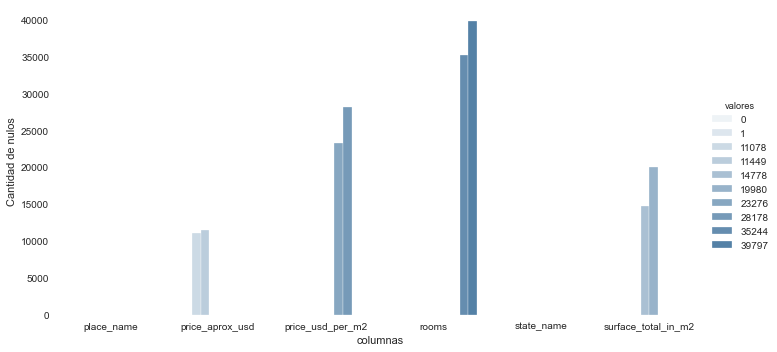

In [113]:
with sns.axes_style('white'):
    g = sns.catplot(x='columnas', y='valores', hue='valores', data=df_graf, aspect=2, kind="bar", color='steelblue')
    g.set_ylabels('Cantidad de nulos')
    

Distribución de propiedades por provincias

In [114]:
final_data['state_name'].value_counts().head(10)

Capital Federal                 27037
Bs.As. G.B.A. Zona Norte        10622
Santa Fe                         7969
Córdoba                          6681
Buenos Aires Costa Atlántica     6461
Bs.As. G.B.A. Zona Sur           5507
Bs.As. G.B.A. Zona Oeste         3618
Buenos Aires Interior             845
Tucumán                           425
Neuquén                           394
Name: state_name, dtype: int64

In [115]:
final_data['state_name'].unique()

array(['Bs.As. G.B.A. Zona Sur', 'Capital Federal',
       'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Oeste', 'Córdoba', 'Santa Fe', 'Salta',
       'Neuquén', 'Río Negro', 'Buenos Aires Interior', 'Chubut',
       'Entre Ríos', 'Misiones', 'Tucumán', 'La Pampa', 'Chaco',
       'San Juan', 'Mendoza', 'Tierra Del Fuego', 'Catamarca',
       'Corrientes', 'San Luis', 'Santa Cruz', 'Santiago Del Estero',
       'Jujuy', 'La Rioja', 'Formosa'], dtype=object)

(array([3.9005e+04, 2.0921e+04, 8.4920e+03, 1.1700e+03, 3.7000e+02,
        4.9200e+02, 3.4300e+02, 1.6900e+02, 3.8000e+01, 6.5000e+01]),
 array([ 0. ,  2.7,  5.4,  8.1, 10.8, 13.5, 16.2, 18.9, 21.6, 24.3, 27. ]),
 <BarContainer object of 10 artists>)

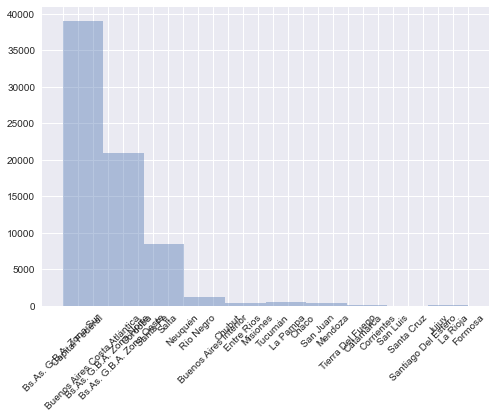

In [116]:
data_gafico = final_data['state_name']
fig = plt.figure()
# creo los axes
ax = plt.axes()
plt.xticks(rotation=45)
# dibujo en axes:
ax.hist(data_gafico, label='Provincia', alpha = 0.4)

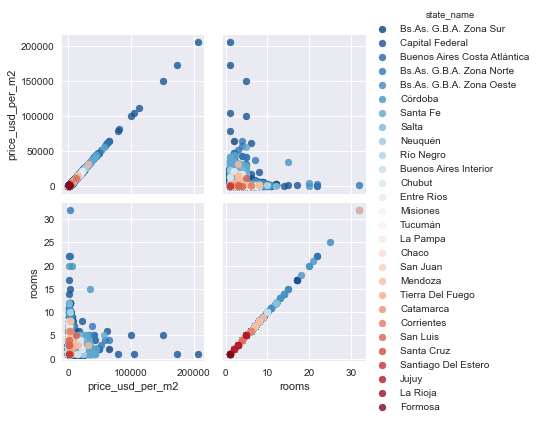

In [117]:
g = sns.PairGrid(final_data, vars=['price_usd_per_m2', 'rooms'],
                 hue='state_name', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)

g.add_legend();

In [118]:

print('Media de precio en dólares %s' % final_data['price_aprox_usd'].mean().round(2))
print('Media de precio en dólares por metro cuadrado %s' % final_data['price_usd_per_m2'].mean().round(2))
print('Media de precio en ambientes %s' % final_data['rooms'].mean().round(2))


Media de precio en dólares 186818.68
Media de precio en dólares por metro cuadrado 2691.01
Media de precio en ambientes 2.32


In [119]:
precio_m2_cuartiles = pd.qcut(final_data['price_usd_per_m2'], 4)
precio_m2_cuartiles

1                            NaN
2               (-0.001, 1647.5]
4             (1647.5, 2142.857]
7         (2783.582, 206333.333]
8         (2783.582, 206333.333]
                   ...          
121211                       NaN
121215    (2783.582, 206333.333]
121217    (2783.582, 206333.333]
121218        (1647.5, 2142.857]
121219        (1647.5, 2142.857]
Name: price_usd_per_m2, Length: 71065, dtype: category
Categories (4, interval[float64]): [(-0.001, 1647.5] < (1647.5, 2142.857] < (2142.857, 2783.582] < (2783.582, 206333.333]]

In [120]:
final_data.pivot_table('price_usd_per_m2', [precio_m2_cuartiles], 'nuevo_usado')

nuevo_usado,nuevo,usado
price_usd_per_m2,,
"(-0.001, 1647.5]",1174.85,1200.02
"(1647.5, 2142.857]",1909.31,1894.58
"(2142.857, 2783.582]",2425.35,2441.58
"(2783.582, 206333.333]",4479.47,5367.66


In [121]:
final_data.pivot_table('price_usd_per_m2', [precio_m2_cuartiles], 'nuevo_usado', aggfunc='std')

nuevo_usado,nuevo,usado
price_usd_per_m2,,
"(-0.001, 1647.5]",438.31,418.26
"(1647.5, 2142.857]",144.38,142.90
"(2142.857, 2783.582]",178.51,180.76
"(2783.582, 206333.333]",4484.82,6518.00


In [122]:
final_data['price_usd_per_m2'].sort_values(ascending=False).head(10)

26637   206333.33
26037   173826.07
15074   150000.00
93661   112500.00
26193   104486.11
5285    100000.00
76235    81333.33
25853    78533.33
27231    65050.00
63150    64666.67
Name: price_usd_per_m2, dtype: float64

In [123]:
mask_valores_altos = final_data['price_usd_per_m2'] > 10000
mask_valores_bajos = final_data['price_usd_per_m2'] < 200

porcentaje_valores_altos = final_data['price_usd_per_m2'][mask_valores_altos | mask_valores_bajos].shape[0] / final_data['price_usd_per_m2'].shape[0] * 100

print('El %s porciento de valores que están por debajo de 200 y por encinma de 10000 USD el metro cuadrado' % round(porcentaje_valores_altos, 2))

El 2.31 porciento de valores que están por debajo de 200 y por encinma de 10000 USD el metro cuadrado


In [124]:
precio_m2_cuartiles_sin_valores_altos = pd.qcut(final_data['price_usd_per_m2'][~mask_valores_altos | ~mask_valores_bajos], 4)
final_data[~mask_valores_altos | ~mask_valores_bajos].pivot_table(['price_usd_per_m2', 'place_name'], \
                                                                  [precio_m2_cuartiles_sin_valores_altos], 'nuevo_usado')

price_usd_per_m2        
nuevo_usado                       nuevo   usado
price_usd_per_m2                               
(-0.001, 1647.5]                1174.85 1200.02
(1647.5, 2142.857]              1909.31 1894.58
(2142.857, 2783.582]            2425.35 2441.58
(2783.582, 206333.333]          4479.47 5367.66

In [125]:
lista_provincias_representativas = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba', \
                                        'Buenos Aires Costa Atlántica', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']

data_state_name_mask = final_data.state_name.apply(lambda x: x in lista_provincias_representativas)
data_state_name = final_data.loc[data_state_name_mask, :]

palette_state_name = ["lightblue", "pink", "yellow", "green", "orange", "red", "blue"]

<AxesSubplot:xlabel='state_name', ylabel='price_usd_per_m2'>

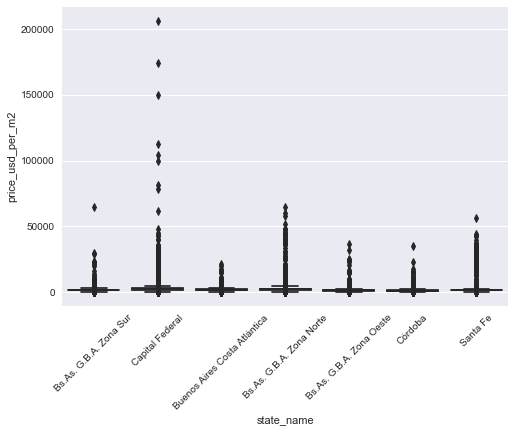

In [126]:
plt.xticks(rotation=45)
sns.boxplot("state_name", "price_usd_per_m2", data=data_state_name, palette = palette_state_name)

In [127]:
data_state_name_sin_outliers = final_data.loc[~mask_valores_altos,:]
data_state_name_sin_outliers = data_state_name_sin_outliers.loc[~mask_valores_bajos,:]

mask_state_name_sin_outliers = data_state_name_sin_outliers.state_name.apply(lambda x: x in lista_provincias_representativas)

data_state_names_sin_outliers_filtrados = data_state_name_sin_outliers.loc[mask_state_name_sin_outliers, :]

In [128]:
print('Precio máximo tenido en cuento para el análisis %s USD' % data_state_name_sin_outliers['price_usd_per_m2'].max())
print('Precio mpínimo tenido en cuento para el análisis %s USD' % data_state_name_sin_outliers['price_usd_per_m2'].min())

Precio máximo tenido en cuento para el análisis 10000.0 USD
Precio mpínimo tenido en cuento para el análisis 200.0 USD


<AxesSubplot:xlabel='state_name', ylabel='price_usd_per_m2'>

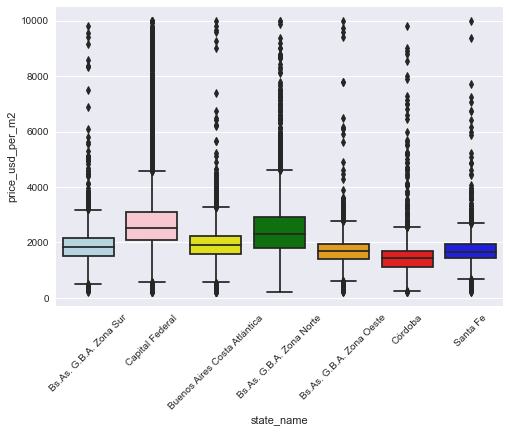

In [129]:
plt.xticks(rotation=45)
sns.boxplot("state_name", "price_usd_per_m2", data=data_state_names_sin_outliers_filtrados, palette = palette_state_name)

<AxesSubplot:xlabel='state_name', ylabel='price_usd_per_m2'>

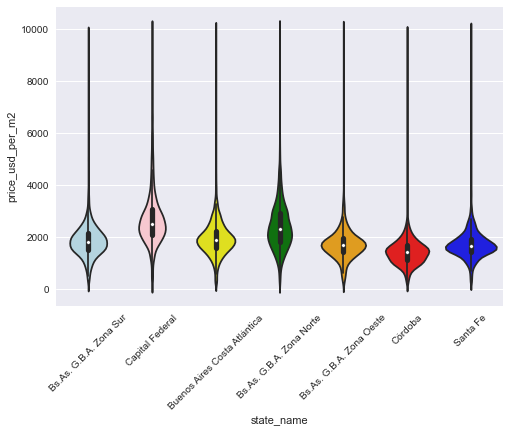

In [130]:
plt.xticks(rotation=45)
sns.violinplot("state_name", "price_usd_per_m2", data=data_state_names_sin_outliers_filtrados, palette = palette_state_name)

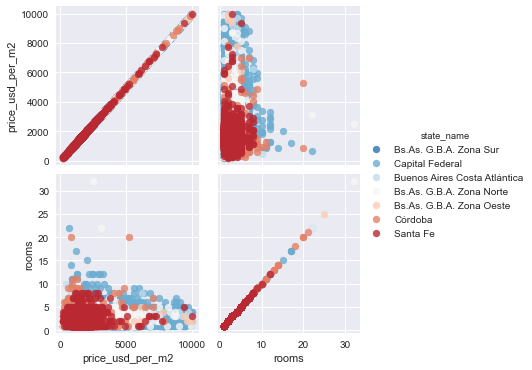

In [131]:
g = sns.PairGrid(data_state_names_sin_outliers_filtrados, vars=['price_usd_per_m2', 'rooms'],
                 hue='state_name', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)

g.add_legend();

In [165]:
lista_solo_caba_gba = ['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste']
lista_solo_caba_gba_mask = data_state_names_sin_outliers_filtrados.state_name.apply(lambda x: x in lista_solo_caba_gba)
data_solo_caba_gba = data_state_names_sin_outliers_filtrados.loc[lista_solo_caba_gba_mask, :]
data_solo_caba_gba.shape

(45524, 7)

In [171]:
precio_m2_cuartiles_solo_caba_gba = pd.qcut(data_solo_caba_gba['price_usd_per_m2'], 4)
data_solo_caba_gba.pivot_table(['price_usd_per_m2', 'state_name'], \
                              [precio_m2_cuartiles_solo_caba_gba], 'nuevo_usado')

price_usd_per_m2        
nuevo_usado                     nuevo   usado
price_usd_per_m2                             
(199.999, 1854.839]           1410.72 1441.34
(1854.839, 2339.626]          2108.03 2101.11
(2339.626, 2922.162]          2600.47 2614.25
(2922.162, 10000.0]           3897.96 3963.17

In [172]:
df = data_solo_caba_gba.groupby(['state_name', 'place_name', 'nuevo_usado'], axis=0)
df['price_usd_per_m2'].mean()

state_name                place_name                nuevo_usado
Bs.As. G.B.A. Zona Norte   los alamos               usado         1600.00
                          Acassuso                  nuevo         5511.11
                                                    usado         2849.20
                          Albanueva Barrio Cerrado  nuevo         3161.57
                                                    usado         2530.16
                                                                    ...  
Capital Federal           Villa Soldati             usado         1096.06
                          Villa Urquiza             nuevo         2640.66
                                                    usado         2576.78
                          Villa del Parque          nuevo         2110.86
                                                    usado         2453.06
Name: price_usd_per_m2, Length: 454, dtype: float64